# ----------------------------  Training the model for prediction  ----------------------------

### Importing Packages

In [16]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD,RMSprop, adadelta, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

C:\Users\Praneet\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Initializing Variables

In [17]:
PATH = os.getcwd()
data_path = './mnist_png/training'
data_Dir_list = os.listdir(data_path)
print(data_Dir_list)
img_row = 28
img_col = 28
num_channel = 1
epoch = 5
num_classes = 10

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


### Loading the Dataset

In [18]:
img_data_list = []
images = []
i = 0

for dataset in data_Dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    for img in img_list:
        i = i+1
        ip_img = cv2.imread(data_path + '/' + dataset + '/' + img)
        ip_img = cv2.cvtColor(ip_img, cv2.COLOR_BGR2GRAY)
        ip_img = cv2.resize(ip_img, (img_row,img_col))
        img_data_list.append(ip_img)
    images.append(i)

print(images)

[6903, 14780, 21770, 28911, 35735, 42048, 48924, 56217, 63042, 70000]


### Converting input dataset to array

In [19]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
img_data.shape

(70000, 28, 28)

### Expanding dimensions of the array

In [20]:
img_data= np.expand_dims(img_data, axis=4)
img_data.shape

C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  if __name__ == '__main__':


(70000, 28, 28, 1)

### Labeling the input dataset

In [21]:
#Preprocessing
n_samples = img_data.shape[0]
labels = np.ones((n_samples,), dtype='int64')

"""label_dictionary = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 'a':'a', 'b':'b', 'c':'c',
                    'd':'d', 'e':'e', 'f':'f', 'g':'g', 'h':'h', 'i':'i', 'j':'j', 'k':'k', 'l':'l', 'm':'m', 'n':'n',
                    'o':'o', 'p':'p', 'q':'q', 'r':'r'}"""
#from numpy import argmax

labels[:images[0]] = data_Dir_list.index(data_Dir_list[0])
label_dictionary = {}
label_dictionary[0] = data_Dir_list[0]

count = 0
for class_name in data_Dir_list:
    if count == 0:
        count += 1
        continue
    else:
        labels[images[count - 1]:images[count]] = data_Dir_list.index(class_name)
        label_dictionary[count] = class_name
        count += 1

#One-Hot encoded format
Y = to_categorical(labels, num_classes)
#Y = argmax(Y)
print(label_dictionary)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


### Shuffling and splitting the dataset into train and test

In [22]:
#Shuffle data
from sklearn.utils import shuffle
x, y = shuffle(img_data, Y, random_state=2)
#Split Dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=2)

### Image Data Generation

In [23]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    shear_range=0.2,
    zoom_range=0.2,
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.05,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### Model with all layers

In [24]:
tf.reset_default_graph()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(img_row, img_col, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (2,2), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         32896     
__________

### Adding Checkpoints

In [25]:
augmented_checkpoint_loss = ModelCheckpoint('augmented_best_model_valloss.hdf5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=1, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
augmented_checkpoint_acc = ModelCheckpoint('augmented_best_model_acc.hdf5',  # model filename
                             monitor='acc', # quantity to monitor
                             verbose=1, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 

### Compile and fit model

In [26]:
model.compile(loss=keras.losses.categorical_crossentropy, # Better loss function for neural networks
              optimizer=keras.optimizers.Adam(), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

hist = model.fit_generator(datagen.flow(X_train, Y_train), # number of samples per gradient update
                    epochs = epoch, # number of iterations
                    validation_data= (X_test, Y_test),
                    callbacks=[augmented_checkpoint_loss,augmented_checkpoint_acc],
                    verbose=1)

Epoch 1/5
1749/1750 [============================>.] - ETA: 0s - loss: 0.6009 - acc: 0.8061
Epoch 00001: val_loss improved from inf to 0.08167, saving model to augmented_best_model_valloss.hdf5

Epoch 00001: acc improved from -inf to 0.80607, saving model to augmented_best_model_acc.hdf5
1750/1750 [==============================] - 60s 35ms/step - loss: 0.6009 - acc: 0.8061 - val_loss: 0.0817 - val_acc: 0.9768
Epoch 2/5
1749/1750 [============================>.] - ETA: 0s - loss: 0.2510 - acc: 0.9280
Epoch 00002: val_loss improved from 0.08167 to 0.05215, saving model to augmented_best_model_valloss.hdf5

Epoch 00002: acc improved from 0.80607 to 0.92800, saving model to augmented_best_model_acc.hdf5
1750/1750 [==============================] - 53s 30ms/step - loss: 0.2509 - acc: 0.9280 - val_loss: 0.0521 - val_acc: 0.9841
Epoch 3/5
1748/1750 [============================>.] - ETA: 0s - loss: 0.2119 - acc: 0.9394
Epoch 00003: val_loss improved from 0.05215 to 0.04469, saving model to a

KeyboardInterrupt: 

### Evaluating the Model

In [12]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.15%


In [14]:
import pandas
pandas.DataFrame(hist).to_csv("history.csv")

PandasError: DataFrame constructor not properly called!

In [ ]:
import pickle
with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)

{'val_loss': [0.08097865689066903, 0.05691589488727706], 'val_acc': [0.9763571428571428, 0.9839285714285714], 'loss': [0.6486498624618564, 0.2688430262000433], 'acc': [0.7858214285714286, 0.9211071428571429]}


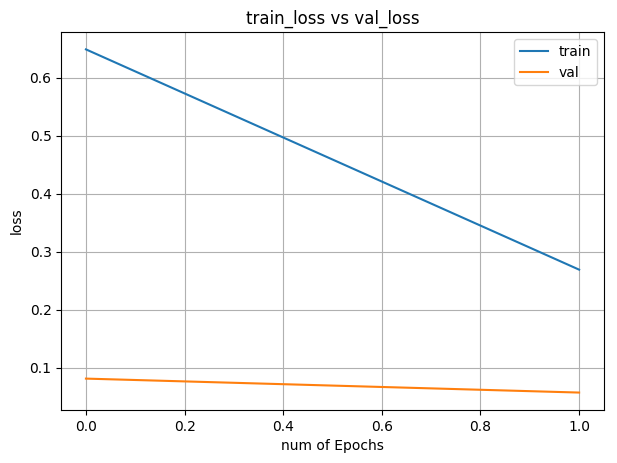

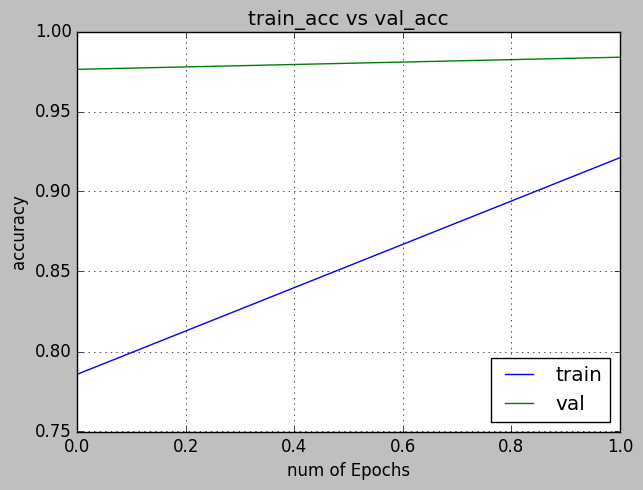

In [28]:
import pickle
    
"""with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)"""
objects = []
with (open("trainHistoryDict", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
his = objects[0]
print(his)

train_loss=his['loss']
val_loss=his['val_loss']
train_acc=his['acc']
val_acc=his['val_acc']
xc=range(epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

In [15]:
print(hist)

[]


(1, 1, 13, 13, 32)
(13, 13, 32)
(13, 13, 32)


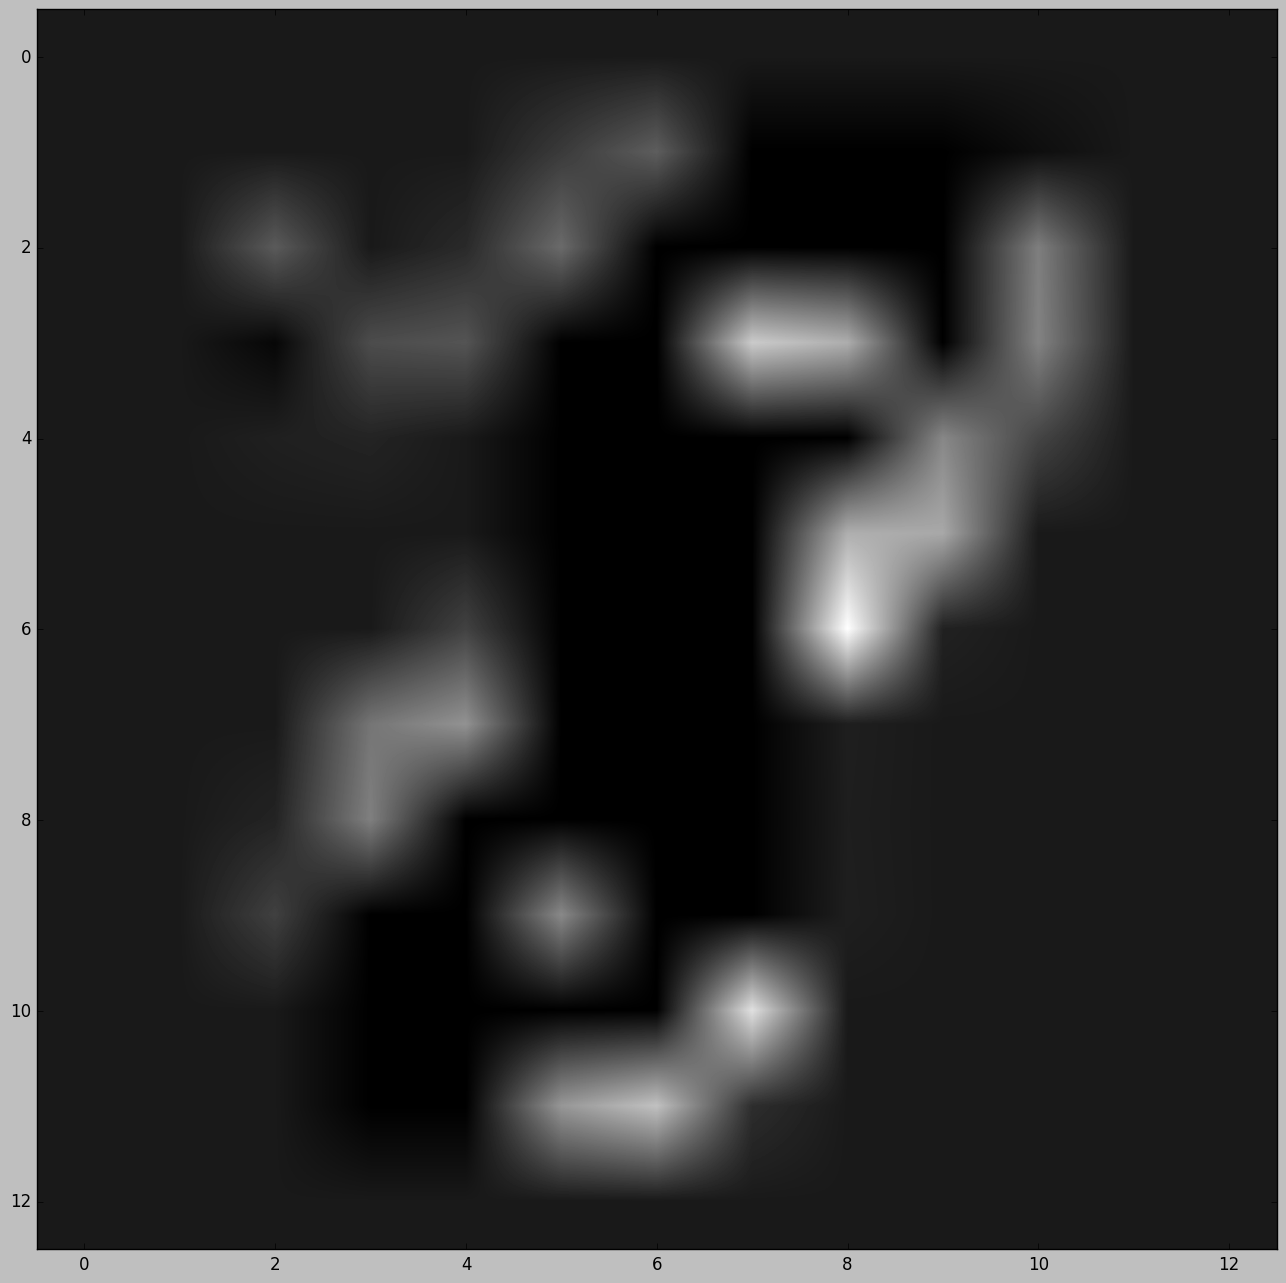

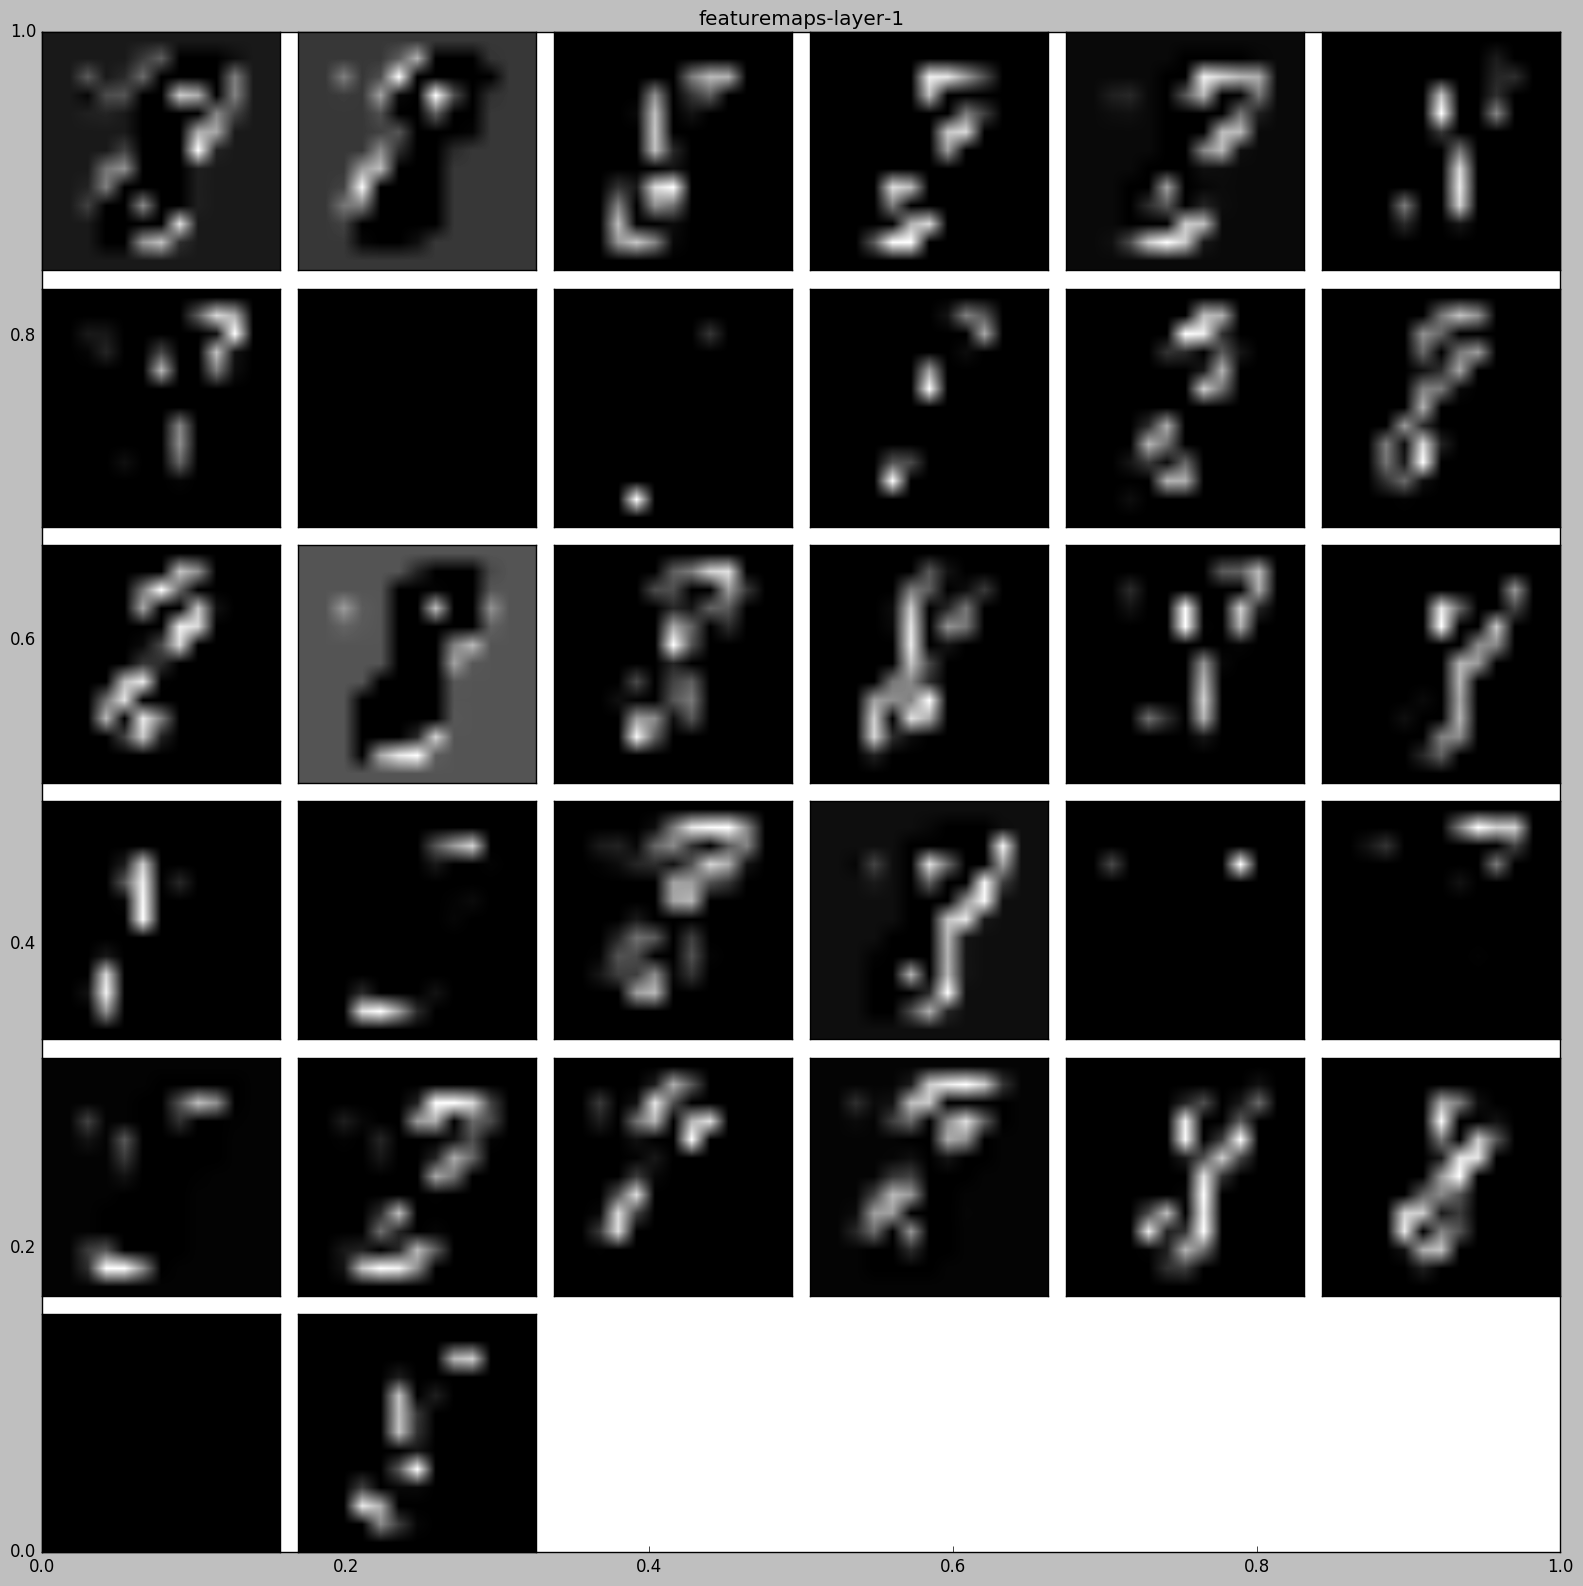

In [35]:
from keras import backend as K

def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=1
filter_num=0
check= np.expand_dims(X_train[9000], axis=0)
check.shape

activations = get_featuremaps(model, int(layer_num),check)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()

### Analyzing the Model

In [3]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

### Saving the Model

In [ ]:
model.save('./Demo2_model/model.hdf5')

### Loading the Model

In [1]:
from keras.models import load_model

model=load_model('augmented_best_model.hdf5')

C:\Users\Praneet\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         32896     
__________

# ---------------------------------------- Prediction ----------------------------------------

In [6]:
import os
from numpy import random
from shutil import copy

folder_list = os.listdir('D:/Important/Clean/Emnist/Cleaned/Output_numbers')
for folder in folder_list:
    print("Processing folder " + folder)
    if folder == '2':
        number = 7000
    elif folder == '3':
        number = 10000
    else:
        number = 12000
    images_list = []
    images_list = os.listdir('D:/Important/Clean/Emnist/Cleaned/Output_numbers/' + folder)
    random_images = []
    random_images = random.choice(images_list,number,replace=False)
    if not os.path.exists('D:/Important/Dataset/numbers/numbers/' + folder):
        os.mkdir('D:/Important/Dataset/numbers/numbers/' + folder)
    for image in random_images:
        copy('D:/Important/Clean/Emnist/Cleaned/Output_numbers/' + folder + "/" + image,
             'D:/Important/Dataset/numbers/numbers/' + folder + "/" + image)

Processing folder 0
Processing folder 1
Processing folder 2
Processing folder 3
Processing folder 4
Processing folder 5
Processing folder 6
Processing folder 7
Processing folder 8
Processing folder 9


In [8]:
lists = ['a','b','c','d','e']
count = 0
dictionar = {}
for l in lists:
    dictionar[count] = l
    count += 1
print(dictionar)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}


In [6]:
some_list = ['a','b','c']
print("".join(some_list))

abc


In [13]:
data = {0:'b',1:'a'}
x = sorted(data.items(), key=lambda x:x[1])
#x = dict(x)
#x = sorted(data.values())
print(x)

[(1, 'a'), (0, 'b')]


In [16]:
res = [[9,8,7,6,12,4,3,2,1]]
diction = {}
ind = 0
for prob in res[0]:
    diction[ind] = prob
    ind += 1
print(diction)
key_m = max(diction.keys(), key=(lambda k: diction[k]))
print(key_m)

{0: 9, 1: 8, 2: 7, 3: 6, 4: 12, 5: 4, 6: 3, 7: 2, 8: 1}
4


In [12]:
import os, PythonMagick
from PythonMagick import Image
from datetime import datetime
import PyPDF2
import numpy as np
import cv2
from imutils import contours
import imutils
import sys
from PyPDF2 import PdfFileWriter, PdfFileReader
from keras.preprocessing import image as im

#input_file = sys.argv[1]
input_file = 'vrkIj.png'
pdf_dir = "./Output_PDFs/"
img_dir = "./Images/"
word_list, character_list, sentence_list = [], [], []
label_dictionary = {0: '_L', 1: '_U', 2: '8', 3: '4', 4: '_V', 5: '_B', 6: 'y', 7: 'j', 8: 'g', 9: '_T',
                    10: '_J', 11: 'l', 12: '_Z', 13: 'f', 14: 'b', 15: '_I', 16: '6', 17: '_F', 18: '_K',
                    19: '0', 20: '_X', 21: '_S', 22: '5', 23: '3', 24: 'd', 25: '_D', 26: '_M', 27: '_O',
                    28: '_G', 29: 'e', 30: 'n', 31: '7', 32: '_A', 33: '_Q', 34: 'i', 35: 'h', 36: '_R',
                    37: 't', 38: '9', 39: '_P', 40: '_E', 41: '_H', 42: '_W', 43: '_N',
                    44: '_Y', 45: '_C', 46: 'r', 47: '1', 48: '2', 49: 'm', 50: 'q', 51: 'a'}

if input_file.endswith(".pdf"):
    convertToSinglePage(input_file)
else:
    preprocessImage(input_file)

[16]


TypeError: 'numpy.int64' object is not iterable

In [11]:
def convertToSinglePage(pdf_file):
    infile = PdfFileReader(open(pdf_file, 'rb'))
    no_of_pages = infile.getNumPages()
    if no_of_pages == 1:
        print("Preprocessing single page PDF")
    else:
        print("Seperating into single page PDFs")
    for i in range(no_of_pages):
        p = infile.getPage(i)
        outfile = PdfFileWriter()
        outfile.addPage(p)
        with open(pdf_dir + 'page-%02d.pdf' % i, 'wb') as f:
            outfile.write(f)
    convertToImage()

def convertToImage():
    i = 1
    for pdf in [pdf_file for pdf_file in os.listdir(pdf_dir) if pdf_file.endswith(".pdf")]:
        input_pdf = pdf_dir + pdf
        img = Image()
        img.density('300')
        img.read(input_pdf)

        size = "%sx%s" % (img.columns(), img.rows())

        output_img = Image(size, "#ffffff")
        output_img.type = img.type
        output_img.composite(img, 0, 0, PythonMagick.CompositeOperator.SrcOverCompositeOp)
        output_img.resize(str(img.rows()))
        output_img.magick('JPG')
        output_img.quality(75)


        #output_jpg = input_pdf.replace(".pdf", ".jpg")
        output_jpg = img_dir + "img_" + str(i) + ".jpg"
        i += 1
        output_img.write(output_jpg)
    pickImages()

def pickImages():
    for img in [img_file for img_file in os.listdir(img_dir) if img_file.endswith(".jpg")]:
        preprocessImage(img_dir + img)
    
def preprocessImage(input_file):
    rotated = adjustSkewing(input_file)
    lineDetection(rotated)
    
def adjustSkewing(input_file):
    # not resizing for now
    input_image = cv2.imread(input_file)
    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = input_image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(input_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

"""gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
kernel = np.ones((10, 80), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[1])
i = 1"""


def lineDetection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    thresh_copy = thresh.copy()
    kernel = np.ones((10, 80), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[1])
    #cropped_images = []
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)

        #dimensions = [x, y, w, h]
        # Getting ROI
        roi = thresh_copy[y:y + h, x:x + w]
        #cropped_images.append(dimensions)
        #cv2.imwrite('test' + str(i) + '.jpg', roi)
        #i += 1
        # show ROI

        #cv2.imshow('segment no:'+str(i),roi)
        #cv2.rectangle(image, (x, y), (x + w, y + h), (90, 0, 255), 2)
        wordDetection(roi)        

def wordDetection(line):
    kernel = np.ones((10, 15), np.uint8)
    img_dilation = cv2.dilate(line, kernel, iterations=1)
    #cv2.imshow('orig', img_dilation)
    #cv2.waitKey(0)
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    word_list = []
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        # Getting ROI
        roi = line[y:y + h, x:x + w]
        characters = characterDetection(roi)
        word_list.append("".join(characters))
        # cv2.imshow('test', roi)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        #cv2.imwrite('test' + str(i) + '.jpg', roi)
        #new_image = cv2.imread('test' + str(i) + '.jpg')
        #gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
        #ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
        #kernel = np.ones((10, 1), np.uint8)
        #img_dilation = cv2.dilate(thresh, kernel, iterations=1)
        #cv2.imshow('dilation', img_dilation)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        #im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #e = thresh.copy()
        #sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
        #character_list = []
    print(" ".join(word_list))
        
def makeSquare(not_square):
    # Adds black pixels as padding
    
    BLACK = [0, 0, 0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square, (2 * width, 2 * height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        if (height > width):
            pad = (height - width)/2
            pad = int(pad)
            #doublesize = int(doublesize)
            doublesize_square = cv2.copyMakeBorder(doublesize, 0, 0, pad,\
                                                  pad, cv2.BORDER_CONSTANT, value = BLACK)
        else:
            pad = (width - height)/2
            pad = int(pad)
            doublesize_square = cv2.copyMakeBorder(doublesize, pad, pad, 0, 0,\
                                                  cv2.BORDER_CONSTANT, value = BLACK)
    doublesize_square_dim = doublesize_square.shape
    return doublesize_square

def resize_to_pixel(dimensions, image):
    
    buffer_pix = 4
    dimensions = dimensions - buffer_pix
    squared = image
    r = float(dimensions)/squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    widht_r = img_dim2[1]
    BLACK = [0, 0, 0]
    if (height_r > widht_r):
        resized = cv2.copyMakeBorder(resized, 0, 0, 0, 1, cv2.BORDER_CONSTANT, value = BLACK)
    if (height_r < widht_r):
        resized = cv2.copyMakeBorder(resized, 1, 0, 0, 0, cv2.BORDER_CONSTANT, value = BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized, p, p, p, p, cv2.BORDER_CONSTANT, value = BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    return ReSizedImg
    
def characterDetection(word):
    kernel = np.ones((10, 1), np.uint8)
    img_dilation = cv2.dilate(word, kernel, iterations=1)
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    character_list = []
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        #dimensions = [x, y, w, h]
        # Getting ROI
        roi = word[y:y + h, x:x + w]
        squared = makeSquare(roi)
        final = resize_to_pixel(28, squared)
        letter = characterPrediction(final)
        character_list.append(letter)
    return character_list
    
def characterPrediction(character):
    predict_img = im.img_to_array(character)
    predict_img = np.expand_dims(predict_img, axis = 0)
    result = model.predict_classes(predict_img)
    print(result)
    dictionary = {}
    index = 0
    for probab in result[0]:
        dictionary[index] = probab
        index += 1
    key_max = max(dictionary.keys(), key=(lambda k: dictionary[k]))
    charac = label_dictionary[key_max]
    return(charac)
    
"""def wordCreation():
    a
    
def spellingCorrection():
    a"""

'def wordCreation():\n    a\n    \ndef spellingCorrection():\n    a'

In [15]:
import cv2
import numpy as np


# not resizing for now
input_image = cv2.imread('C:/Users/Praneet/Desktop/img_2.jpg')
resize = cv2.resize(input_image, (500, 700))
cv2.imshow('resized',resize)
cv2.waitKey(0)
gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
(h, w) = input_image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(input_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
rotated = cv2.resize(rotated, (500, 700))
cv2.imshow('rotated',rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
from keras.models import model_from_json

### Load previous model(with maxpool) here
js_model = open('model_without_maxpool3.json')
mdl = js_model.read()
js_model.close()
model = model_from_json(mdl)
model.load_weights('model_without_maxpool3.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.save('finalbestmodel.hdf5')